MASUKAN DATASET

In [1]:

# Downloading Dataset
!echo Download Dataset AlkisahFoto
%cd /content
!gdown 1ghrTpTC7MeW1iBNDKmAq36mZ3_shMs_J
!echo Unpacking dataset
!unrar x 'datasetalkisahfoto.rar' -idq && rm 'datasetalkisahfoto.rar'
!echo dataset unpacked

Download Dataset AlkisahFoto
/content
Downloading...
From: https://drive.google.com/uc?id=1ghrTpTC7MeW1iBNDKmAq36mZ3_shMs_J
To: /content/datasetalkisahfoto.rar
100% 601/601 [00:00<00:00, 1.18MB/s]
Unpacking dataset
dataset unpacked


PAST PREDICTION

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
source_dataset = pd.read_csv('datasetalkisahfoto.csv')

In [5]:
source_dataset.describe()

,omset,order,profit
count,7.200000e+01,72.000000,7.200000e+01
mean,3.252500e+06,1.652778,1.280556e+06
std,2.752059e+06,1.415803,8.653972e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,1.700000e+06,1.000000,9.000000e+05
50%,2.050000e+06,1.000000,1.250000e+06
75%,5.100000e+06,3.000000,1.700000e+06
max,1.140000e+07,5.000000,3.800000e+06


In [6]:
source_dataset.tail()

,date,symbol,omset,order,profit
67,2022-07-30,WED,3000000,1,1200000
68,2022-08-01,PRE,7700000,4,2800000
69,2022-08-08,ENG,8600000,4,2300000
70,2022-08-21,WED,11400000,4,3800000
71,2022-08-31,ENG,6400000,4,1600000


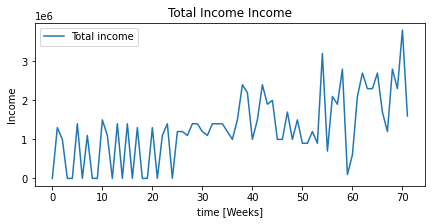

In [7]:
plt.figure(figsize=(7, 3));

plt.plot(source_dataset.profit.values, label='Total income')
#plt.plot(source_dataset.order.values, label='Total Order')
#plt.plot(df[df.symbol == 'WED'].order.values, color='green', label='close')
plt.title('Total Income Income')
plt.xlabel('time [Weeks]')
plt.ylabel('Income')
plt.legend(loc='best')
#plt.show()



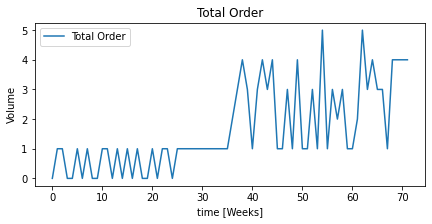

In [8]:
plt.figure(figsize=(7, 3));
plt.plot(source_dataset.order.values, label='Total Order')
plt.title('Total Order')
plt.xlabel('time [Weeks]')
plt.ylabel('Volume')
plt.legend(loc='best')

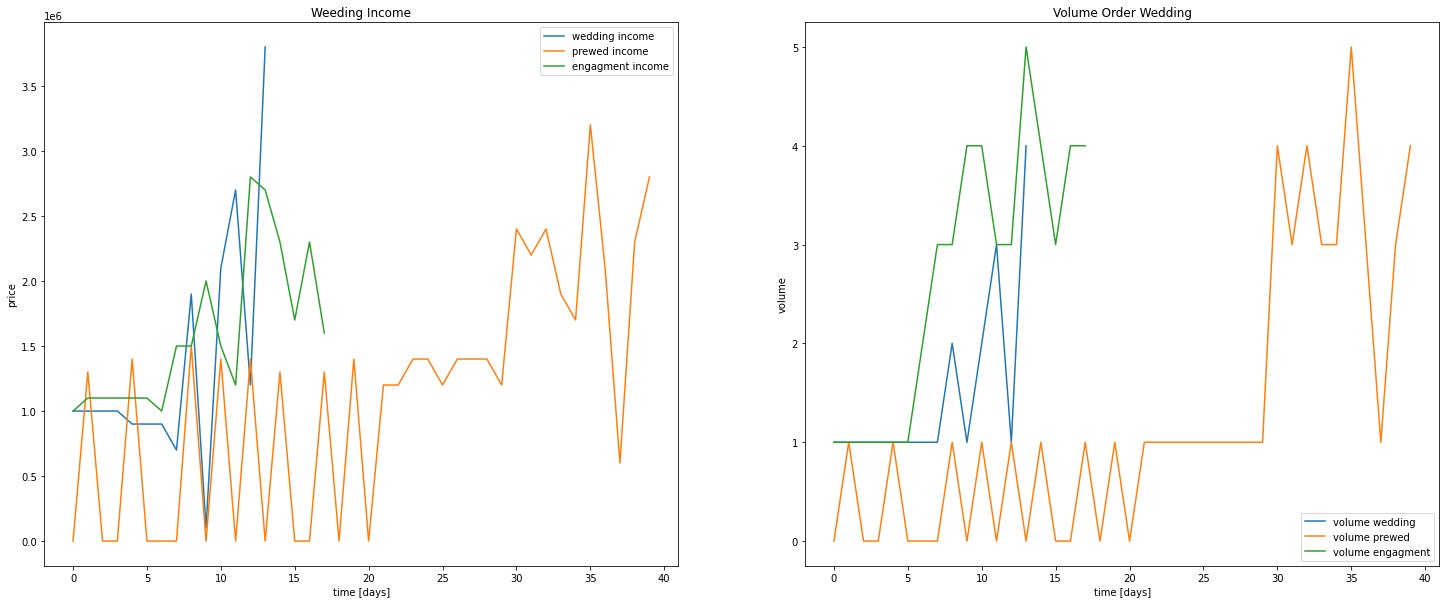

In [9]:
plt.figure(figsize=(25, 10));
plt.subplot(1,2,1);
plt.plot(source_dataset[source_dataset.symbol == 'WED'].profit.values, label='wedding income')
plt.plot(source_dataset[source_dataset.symbol == 'PRE'].profit.values, label='prewed income')
plt.plot(source_dataset[source_dataset.symbol == 'ENG'].profit.values, label='engagment income')
#plt.plot(df[df.symbol == 'WED'].order.values, color='green', label='close')
plt.title('Weeding Income')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);

plt.plot(source_dataset[source_dataset.symbol == 'WED'].order.values, label='volume wedding')
plt.plot(source_dataset[source_dataset.symbol == 'PRE'].order.values, label='volume prewed')
plt.plot(source_dataset[source_dataset.symbol == 'ENG'].order.values, label='volume engagment')
plt.title('Volume Order Wedding')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='lower right');

In [10]:
x = source_dataset[['omset','order']].values
y = source_dataset['profit'].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=0)

In [12]:
regressor = LinearRegression()


In [13]:
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
print(regressor.coef_)

[ 3.50910699e-01 -6.73678570e+04]


In [15]:
print(regressor.intercept_)

260653.21769528615


In [16]:
predicted = regressor.predict(x_test)

In [17]:
print(predicted)

[ 256449.28655927  789833.54939862 1246017.45840596  789833.54939862
  824924.61932226 1140744.24863503  789833.54939862 1175835.31855867
  895106.75916954 2237010.26481406 2234195.98196534  895106.75916954
  789833.54939862 2447556.6843559   895106.75916954 1246017.45840596
 3991563.76099612 2696008.45667011 1988558.49249985  260653.21769529
 3041290.59020909 1140744.24863503  754742.47947498 1246017.45840596
  789833.54939862  260653.21769529 3292556.64537201 1246017.45840596
  930197.82909318 1637647.79326344 1570279.93626487 1140744.24863503
 2020835.27957478  895106.75916954  260653.21769529 3009013.80313416]


In [18]:
dataframe = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})

In [19]:
dataframe.head(30)

,Actual,Predicted
0,1200000,2.564493e+05
1,1100000,7.898335e+05
2,1000000,1.246017e+06
3,1100000,7.898335e+05
4,1200000,8.249246e+05
5,900000,1.140744e+06
6,1100000,7.898335e+05
7,100000,1.175835e+06
8,1400000,8.951068e+05
9,1600000,2.237010e+06


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 337296.9258008888
Mean Squared Error: 168559602457.0287
Root Mean Squared Error: 410560.1082144108


In [21]:
graph =dataframe.head(25)


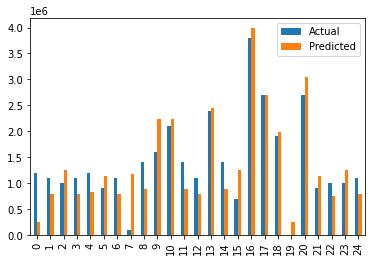

In [22]:
graph.plot(kind='bar')

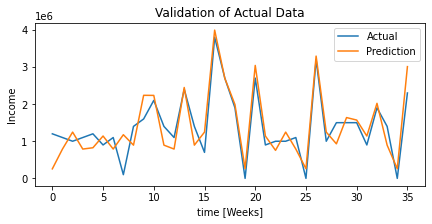

In [23]:
plt.figure(figsize=(7, 3));
plt.title('Validation of Actual Data')
plt.plot(dataframe['Actual'], '',label='Actual')
plt.plot(dataframe['Predicted'], '',label='Prediction')
plt.legend()
#plt.show()
#plt.savefig('LossVal_loss')


plt.xlabel('time [Weeks]')
plt.ylabel('Income')
plt.legend(loc='best')


FUTURE PREDICTION 20 Weeks to Next (omset)

In [24]:
df_future = source_dataset[['omset']]

In [25]:
future_pday = 20
df_future['Prediction']=df_future[['omset']].shift(-future_pday)
df_future.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,omset,Prediction
68,7700000,NaN
69,8600000,NaN
70,11400000,NaN
71,6400000,NaN


In [26]:
X =np.array(df_future.drop(['Prediction'], 1))[:-future_pday]
print(X)

[[      0]
 [1900000]
 [1600000]
 [      0]
 [      0]
 [2000000]
 [      0]
 [1700000]
 [      0]
 [      0]
 [2100000]
 [1700000]
 [      0]
 [2000000]
 [      0]
 [2000000]
 [      0]
 [1900000]
 [      0]
 [      0]
 [1900000]
 [      0]
 [1700000]
 [2000000]
 [      0]
 [1800000]
 [ 180000]
 [1700000]
 [2000000]
 [2000000]
 [1800000]
 [1700000]
 [2000000]
 [2000000]
 [2000000]
 [1800000]
 [3000000]
 [4500000]
 [7000000]
 [6500000]
 [3000000]
 [4500000]
 [7000000]
 [5500000]
 [6000000]
 [3000000]
 [3000000]
 [5000000]
 [3000000]
 [4500000]
 [2700000]
 [2700000]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [27]:
Y= np.array(df_future['Prediction'])[:-future_pday]
print(Y)

[ 1900000.        0.  1700000.  2000000.        0.  1800000.   180000.
  1700000.  2000000.  2000000.  1800000.  1700000.  2000000.  2000000.
  2000000.  1800000.  3000000.  4500000.  7000000.  6500000.  3000000.
  4500000.  7000000.  5500000.  6000000.  3000000.  3000000.  5000000.
  3000000.  4500000.  2700000.  2700000.  4700000.  2700000.  9600000.
  3000000.  6200000.  5400000.  8200000.  2800000.  1800000.  6000000.
  7900000.  6800000.  6400000.  8500000.  4700000.  3000000.  7700000.
  8600000. 11400000.  6400000.]


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.25)

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
tree = DecisionTreeRegressor().fit(X_train, Y_train)
lr = LinearRegression().fit(X_train, Y_train)

In [31]:
X_future = df_future.drop(['Prediction'], 1)[:-future_pday]
X_future = X_future.tail(future_pday)
X_future = np.array(X_future) 
X_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[2000000],
       [2000000],
       [2000000],
       [1800000],
       [3000000],
       [4500000],
       [7000000],
       [6500000],
       [3000000],
       [4500000],
       [7000000],
       [5500000],
       [6000000],
       [3000000],
       [3000000],
       [5000000],
       [3000000],
       [4500000],
       [2700000],
       [2700000]])

In [32]:
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()

lr_predict = lr.predict(X_future)
print(lr_predict)

[4542857.14285714 4542857.14285714 4542857.14285714 3000000.
 5300000.         6000000.         7900000.         2800000.
 5300000.         6000000.         7900000.         3000000.
 6400000.         5300000.         5300000.         3000000.
 5300000.         6000000.         6400000.         6400000.        ]

[3916209.12096879 3916209.12096879 3916209.12096879 3828429.22913075
 4355108.58015899 5013457.7689443  6110706.41691981 5891256.68732471
 4355108.58015899 5013457.7689443  6110706.41691981 5452357.2281345
 5671806.9577296  4355108.58015899 4355108.58015899 5232907.4985394
 4355108.58015899 5013457.7689443  4223438.74240193 4223438.74240193]


PREDIKSI PROFIT 20 WEEKS

In [33]:
df_futureProfit = source_dataset[['profit']]

In [34]:
future_pdayprofit = 20
df_futureProfit['Predictionprofit']=df_futureProfit[['profit']].shift(-future_pdayprofit)
df_futureProfit.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,profit,Predictionprofit
68,2800000,NaN
69,2300000,NaN
70,3800000,NaN
71,1600000,NaN


In [35]:
Xprofit =np.array(df_futureProfit.drop(['Predictionprofit'], 1))[:-future_pdayprofit]
print(Xprofit)

[[      0]
 [1300000]
 [1000000]
 [      0]
 [      0]
 [1400000]
 [      0]
 [1100000]
 [      0]
 [      0]
 [1500000]
 [1100000]
 [      0]
 [1400000]
 [      0]
 [1400000]
 [      0]
 [1300000]
 [      0]
 [      0]
 [1300000]
 [      0]
 [1100000]
 [1400000]
 [      0]
 [1200000]
 [1200000]
 [1100000]
 [1400000]
 [1400000]
 [1200000]
 [1100000]
 [1400000]
 [1400000]
 [1400000]
 [1200000]
 [1000000]
 [1500000]
 [2400000]
 [2200000]
 [1000000]
 [1500000]
 [2400000]
 [1900000]
 [2000000]
 [1000000]
 [1000000]
 [1700000]
 [1000000]
 [1500000]
 [ 900000]
 [ 900000]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [36]:
Yprofit= np.array(df_futureProfit['Predictionprofit'])[:-future_pdayprofit]
print(Yprofit)

[1300000.       0. 1100000. 1400000.       0. 1200000. 1200000. 1100000.
 1400000. 1400000. 1200000. 1100000. 1400000. 1400000. 1400000. 1200000.
 1000000. 1500000. 2400000. 2200000. 1000000. 1500000. 2400000. 1900000.
 2000000. 1000000. 1000000. 1700000. 1000000. 1500000.  900000.  900000.
 1200000.  900000. 3200000.  700000. 2100000. 1900000. 2800000.  100000.
  600000. 2100000. 2700000. 2300000. 2300000. 2700000. 1700000. 1200000.
 2800000. 2300000. 3800000. 1600000.]


In [37]:
X_trainprofit, X_testprofit, Y_trainprofit, Y_testprofit = train_test_split(Xprofit,Yprofit,test_size =0.25)

In [38]:
treeprofit = DecisionTreeRegressor().fit(X_trainprofit, Y_trainprofit)
lr_profit = LinearRegression().fit(X_trainprofit, Y_trainprofit)

In [39]:
X_futureprofit = df_futureProfit.drop(['Predictionprofit'], 1)[:-future_pdayprofit]
X_futureprofit = X_futureprofit.tail(future_pdayprofit)
X_futureprofit = np.array(X_futureprofit) 
X_futureprofit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[1400000],
       [1400000],
       [1400000],
       [1200000],
       [1000000],
       [1500000],
       [2400000],
       [2200000],
       [1000000],
       [1500000],
       [2400000],
       [1900000],
       [2000000],
       [1000000],
       [1000000],
       [1700000],
       [1000000],
       [1500000],
       [ 900000],
       [ 900000]])

In [40]:
treeprofit_prediction = treeprofit.predict(X_futureprofit)
print(treeprofit_prediction)
print()

lr_profit = lr_profit.predict(X_futureprofit)
print(lr_profit)

[1733333.33333333 1733333.33333333 1733333.33333333  900000.
 1900000.         1733333.33333333 2750000.         2750000.
 1900000.         1733333.33333333 2750000.         2300000.
 2300000.         1900000.         1900000.         1200000.
 1900000.         1733333.33333333 2700000.         2700000.        ]

[1743215.0378776  1743215.0378776  1743215.0378776  1714648.0998334
 1686081.16178921 1757498.5068997  1886049.72809858 1857482.79005438
 1686081.16178921 1757498.5068997  1886049.72809858 1814632.38298809
 1828915.85201018 1686081.16178921 1686081.16178921 1786065.44494389
 1686081.16178921 1757498.5068997  1671797.69276711 1671797.69276711]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


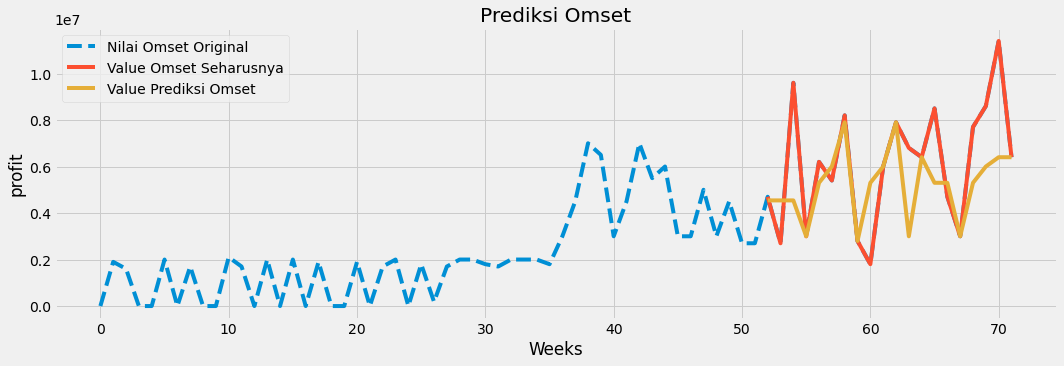

In [41]:

matplotlib.style.use('fivethirtyeight')


plt.figure(figsize=(16,5))
plt.title('Prediksi Omset')
plt.xlabel('Weeks')
plt.ylabel('profit')


#MENAMPILKAN HASIL PREDIKSI OMSET
#structure tree prediction
prediction_future_it = tree_prediction
valid=df_future[X.shape[0]:]
valid['Prediction'] = prediction_future_it

#plt.plot(source_dataset.profit.values,'', label='Total income')
plt.plot(df_future['omset'],'--')
plt.plot(valid[['omset','Prediction']],)
plt.legend(['Nilai Omset Original','Value Omset Seharusnya','Value Prediksi Omset'])
#plt.legend(['Actual Income','Prediction Income'])


#MENAMPILKAN HASIL PREDIKSI PROFIT


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


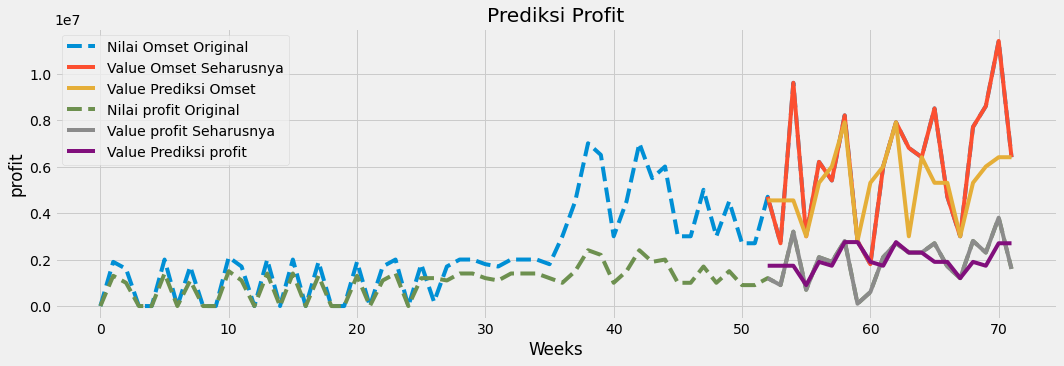

In [42]:

matplotlib.style.use('fivethirtyeight')


plt.figure(figsize=(16,5))
plt.title('Prediksi Profit')
plt.xlabel('Weeks')
plt.ylabel('profit')


#MENAMPILKAN HASIL PREDIKSI OMSET
prediction_future_it = tree_prediction
valid=df_future[X.shape[0]:]
valid['Prediction'] = prediction_future_it

#plt.plot(source_dataset.profit.values,'', label='Total income')
plt.plot(df_future['omset'],'--')
plt.plot(valid[['omset','Prediction']],)





#MENAMPILKAN HASIL PREDIKSI PROFIT
#structure tree prediction
prediction_future_profit = treeprofit_prediction
validprofit=df_futureProfit[Xprofit.shape[0]:]
validprofit['Predictionprofit'] = prediction_future_profit

#plt.plot(source_dataset.profit.values,'', label='Total income')
plt.plot(df_futureProfit['profit'],'--')
plt.plot(validprofit[['profit','Predictionprofit']],)
plt.legend(['Nilai Omset Original','Value Omset Seharusnya','Value Prediksi Omset','Nilai profit Original','Value profit Seharusnya','Value Prediksi profit'])
#plt.legend(['Actual Income','Prediction Income'])



#MENAMPILKAN HASIL PREDIKSI PROFIT




Prediksi Order

In [1]:
import pyspark
 
# importing sparksession from
# pyspark.sql module
from pyspark.sql import SparkSession
 
# creating sparksession and giving
# an app name
spark = SparkSession.builder.appName('sparkdf').getOrCreate()
 
# list  of employee data with 5 row values
data = [["1", "sravan", "company 1"],
        ["2", "ojaswi", "company 2"],
        ["3", "bobby", "company 3"],
        ["4", "rohith", "company 2"],
        ["5", "gnanesh", "company 1"]]
 
# specify column names
columns = ['Employee ID', 'Employee NAME', 'Company Name']
 
# creating a dataframe from the lists of data
dataframe = spark.createDataFrame(data, columns)
 
print(dataframe)

FileNotFoundError: [WinError 2] The system cannot find the file specified